In [175]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
import itertools

[[1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[3. 1. 1. 1. 1.]
[[1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[5. 1. 1. 1. 1.]
[[1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[7. 1. 1. 1. 1.]
[[1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[9. 1. 1. 1. 1.]
[[1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[11.  1.  1.  1.  1.]
[[1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[13.  1.  1.  1.  1.]
[[1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[15.  1.  1.  1.  1.]
[[1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[17.  1.  1.  1.  1.]
[[1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[19.  1.  1.  1.  1.]
[[1

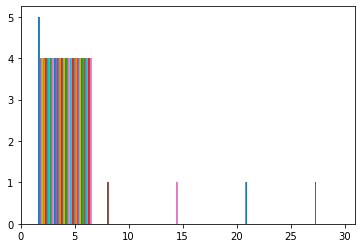

In [177]:
def is_coprime(x, y):
    return np.gcd(x, y) == 1

def is_prime(n):
    if n < 2:
        return False
    for number in islice(itertools.count(2), int(np.sqrt(n) - 1)):
        if n % number == 0:
            return False

    return True

class Generator:
    # linear congruential generator
    def lcg(self, limit, a, c, modulus, seed=1):
        fvalue = 0
        x = seed
        while fvalue < limit:
            fvalue += 1
            x = (a * x + c) % modulus
            yield x

    # Blum Blum Shub
    def bbd(self, limit, p, q, seed=1):
        np.random.seed(seed)
        if not (is_prime(p) and p % 4 == 3 and is_prime(q) and q % 4 == 3):
            raise ValueError("Wrong p or q")
        M = p * q
        # print(f"p = {p}")
        # print(f"q = {q}")
        # print(f"M = {M}")
        xs = np.array(np.nonzero(is_coprime(np.arange(2, M, dtype="int"), M)))[0]
        x_ind = np.random.randint(0, len(xs))
        np.random.seed()
        x = xs[x_ind]
        # print(f"x = {x}")
        fvalue = 0
        while fvalue < limit:
            fvalue += 1
            out = 0
            for i in range(5):
                x = x ** 2 % M
                out *= 2
                out += x % 2
            yield out

    # linear feedback shift register
    def lfsr(self, limit, seed=(1, 1, 1, 1, 1)):
        n = 5
        A = np.identity(n)
        #https://books.ifmo.ru/file/pdf/958.pdf
        A[0] = (1, 0, 0, 1, 1)
        
        x = seed
        fvalue = 0
        while fvalue < limit:
            fvalue += 1
            print(A)
            x = A.dot(x)
            print(x)

            yield x


count = 1000
m = 32
a = 17
c = 5

generator = Generator()
values = []
for value in generator.lcg(count, a, c, m):
    values.append(value)

plt.hist(values, bins=m)
plt.title("Линейного конгруэнтный генератор (LCG)")
plt.xlim(0, 31)
plt.show()

values = []
for value in generator.bbd(10000, 131, 47, seed=5):
    values.append(value)
plt.hist(values, bins=m)
plt.xlim(0, 31)
plt.title("Генератор псевдослучайных чисел BBS")
plt.show()

values = []
for value in generator.lfsr(100):
    values.append(value)
plt.hist(values, bins=m)
plt.xlim(0, 31)
#plt.title("Генератор псевдослучайных чисел BBS")
plt.show()

In [178]:
from libgf2.gf2 import GF2QuotientRing


def companion_matrix_of_field(field):
    n = field.degree

    # Construct companion matrix
    C = np.zeros((n,n), dtype=np.uint8)
    k = np.arange(n-1)
    C[k+1,k] = 1          # subdiagonal
    C[:,n-1] = [(field.coeffs >> k) & 1 for k in xrange(n)]
    return C

companion_matrix_of_field()


ModuleNotFoundError: No module named 'libgf2'